In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from utils.binstat import plot_xstat
from utils.fs_cut import get_str_max

data = pd.read_csv('data/2022-08-21_rnne_NC_250_fGScatter_20MeV_KE_cut_test_with_pred.csv.xz')

In [2]:
data.columns

Index(['lstm_EE_pred.total', 'lstm_EE_pred.primary', 'lstm_EE_pred.secondary',
       'addr.event', 'addr.run', 'addr.subRun', 'anye.hadE', 'anye.lepE',
       'anye.longestTrackContained', 'anye.nuE', 'event.calE', 'event.charge',
       'event.nHits', 'g.fGscatter', 'mc.hadE', 'mc.isCC', 'mc.lepE',
       'mc.lepPdg', 'mc.mode', 'mc.nuE', 'mc.pdg', 'mc.vtxContain',
       'mc.fpdgCode', 'particle.calE', 'particle.charge', 'particle.dir.x',
       'particle.dir.y', 'particle.dir.z', 'particle.energy',
       'particle.is_shower', 'particle.length', 'particle.nHit',
       'particle.start.x', 'particle.start.y', 'particle.start.z'],
      dtype='object')

In [3]:
isinstance(data['particle.calE'][0], str)

True

In [4]:
data['particle.calE'][1]

nan

In [2]:
maxtrackE=np.vectorize(get_str_max)
maxtracEarr=maxtrackE(data['particle.calE'])
predt = data['lstm_EE_pred.total']
truet = data['mc.nuE']

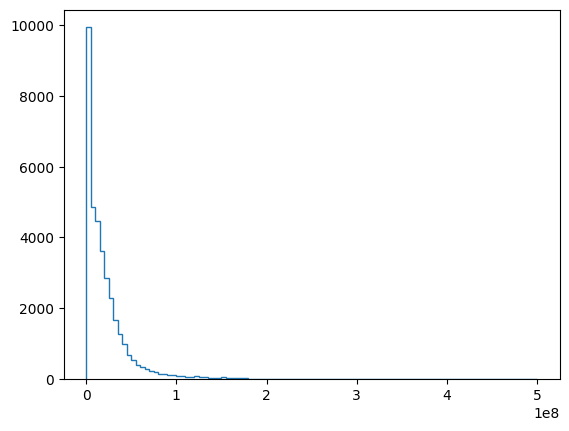

In [5]:
plt.hist(maxtracEarr, bins=100, range=(0, 5*10**8), histtype='step', label='max track E')
plt.show()

In [6]:
sum(maxtracEarr>0.1*10**8)

21274

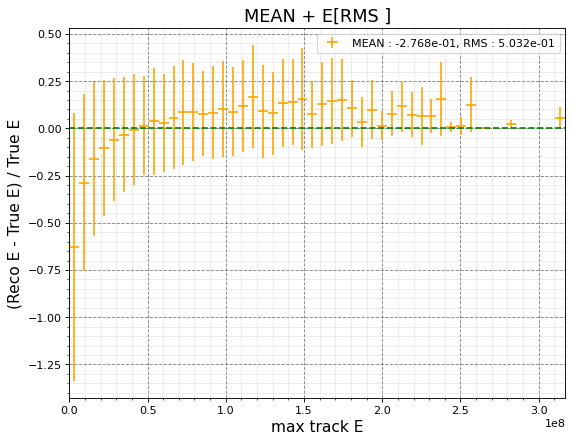

In [23]:
_, _, _ = plot_xstat(
    maxtracEarr,
    (predt - truet) / truet,
    bins=50,
    outdir=".",
    name="maxtrackE",
    ext="pdf",
    xlabel="max track E",
    ylabel="(Reco E - True E) / True E",
)

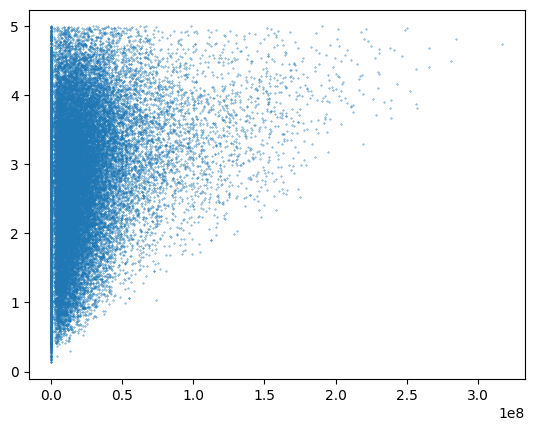

In [25]:
plt.scatter(maxtracEarr, truet, s=0.1)